In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

## 1. Загружаем и изучаем датасет новостных текстов 20Newsgroups

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [ ]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
print (newsgroups_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







### Выведите количество и названия классов датасета

### 2. Предварительная обработка текста: удаление стоп-слов, стемминг

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import tqdm


def preprocess_text(texts):
    stop_words = set(stopwords.words('english'))
    regex = re.compile('[^a-z A-Z]')
    preprocess_texts = []
    for i in  tqdm.tqdm(range(len(texts))):
        text = texts[i].lower()
        text = regex.sub(' ', text)
        word_tokens = word_tokenize(text)
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        preprocess_texts.append( ' '.join(filtered_sentence))

    return preprocess_texts

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
newsgroups_train['preprocess_data'] = preprocess_text(newsgroups_train.data)

100%|██████████| 11314/11314 [00:16<00:00, 668.93it/s]


In [ ]:
newsgroups_test['preprocess_data'] = preprocess_text(newsgroups_test.data)

100%|██████████| 7532/7532 [00:10<00:00, 729.55it/s]


In [ ]:
print(newsgroups_train['preprocess_data'][0])

lerxst wam umd edu thing subject car nntp posting host rac wam umd edu organization university maryland college park lines wondering anyone could enlighten car saw day door sports car looked late early called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please e mail thanks il brought neighborhood lerxst


In [ ]:
from nltk.stem.lancaster import LancasterStemmer

In [ ]:
def stemming_texts(texts):
  st = LancasterStemmer()
  stem_text = []
  for text in tqdm.tqdm(texts):
    word_tokens = word_tokenize(text)
    stem_text.append(' '.join([st.stem(word) for word in word_tokens]))
  return stem_text

In [ ]:
newsgroups_train['data_stemming'] = \
                           stemming_texts(newsgroups_train.preprocess_data)

100%|██████████| 11314/11314 [00:44<00:00, 252.34it/s]


In [ ]:
newsgroups_test['data_stemming'] = \
                            stemming_texts(newsgroups_test.preprocess_data)

100%|██████████| 7532/7532 [00:27<00:00, 276.46it/s]


In [ ]:
print(newsgroups_train.data_stemming[0])

lerxst wam umd edu thing subject car nntp post host rac wam umd edu org univers maryland colleg park lin wond anyon could enlight car saw day door sport car look lat ear cal bricklin door real smal addit front bump sep rest body know anyon tellm model nam engin spec year produc car mad hist whatev info funky look car pleas e mail thank il brought neighb lerxst


In [ ]:
print(newsgroups_train.preprocess_data[0])

lerxst wam umd edu thing subject car nntp posting host rac wam umd edu organization university maryland college park lines wondering anyone could enlighten car saw day door sports car looked late early called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please e mail thanks il brought neighborhood lerxst


### 3. Перевод текста в вещественное пространство признаков

#### 3.1 Bag of Words (мешок слов)

Основное предположение данного метода — порядок слов в документе не важен,

а все документы представляются в виде матрицы $ T = (t)_{d,w}$,

каждая строка в которой соответствует отдельному документу или тексту,

а каждый столбец — определенному слову.

Элемент $t_{d,w}$ соответствует количеству вхождений слова $w$ в документ $d$.







In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
vectorizer.fit(['порядок слов в документе не важен', 'мешок слов'])

CountVectorizer()

In [ ]:
vectorizer.get_feature_names_out()

array(['важен', 'документе', 'мешок', 'не', 'порядок', 'слов'],
      dtype=object)

In [ ]:
vectorizer.transform(['важен порядок', 'не мешок не порядок']).toarray()

array([[1, 0, 0, 0, 1, 0],
       [0, 0, 1, 2, 1, 0]])

In [ ]:
def bow(vectorizer, train, test):
  train_bow = vectorizer.fit_transform(train)
  test_bow = vectorizer.transform(test)
  return train_bow, test_bow

In [ ]:
X_train_bow, X_test_bow = bow(vectorizer,
                              newsgroups_train.data,
                              newsgroups_test.data)

In [ ]:
X_train_bow.shape

(11314, 130107)

In [ ]:
X_test_bow.shape

(7532, 130107)

In [ ]:
X_train_bow_preprocess, X_test_bow_preprocess = bow(vectorizer,
                                                    newsgroups_train.preprocess_data,
                                                    newsgroups_test.preprocess_data)

In [ ]:
X_train_bow_preprocess.shape

(11314, 88863)

In [ ]:
X_test_bow_preprocess.shape

(7532, 88863)

In [ ]:
X_train_bow_stem, X_test_bow_stem = bow(vectorizer,
                                        newsgroups_train.data_stemming,
                                        newsgroups_test.data_stemming)

In [ ]:
X_train_bow_stem.shape

(11314, 61221)

In [ ]:
X_test_bow_stem.shape

(7532, 61221)

#### 3.2 Bag of Words & TF IDF

$TF-IDF$ — это статистическая мера, используемая для оценки

важности слова в контексте документа. Вычисляется по формуле:

$$TF-IDF(w, d, D) = TF(w, d) × IDF(w, D)$$

$TF$ — частота слова, оценивает важность слова $w_i$ в пределах отдельного документа.

$$TF(w, d) = \frac{n_i}{\sum_k n_k}$$

$n_i$ — число вхождений слова $i$ в документ.

$\sum_k n_k$ — общее число слов в данном документе.

$IDF$ — обратная частота документа.

Учёт $IDF$ уменьшает вес широко употребляемых слов.
$$IDF(w, D) = \log \frac{|D|}{|w_i \subset d_i|}, \text{где}$$

$|D|$ — количество документов в корпусе.

$|w_i \subset d_i|$ — количество документов,

в которых встречается слово $w_i$.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer_tf_idf = TfidfVectorizer()

In [ ]:
X_train_tfidf, X_test_tfidf = bow(vectorizer_tf_idf,
                                  newsgroups_train.data,
                                  newsgroups_test.data)

In [ ]:
X_train_tfidf_preprocess, X_test_tfidf_preprocess = bow(vectorizer_tf_idf,
                                                        newsgroups_train.preprocess_data,
                                                        newsgroups_test.preprocess_data)

In [ ]:
X_train_tfidf_stem, X_test_tfidf_stem = bow(vectorizer_tf_idf,
                                            newsgroups_train.data_stemming,
                                            newsgroups_test.data_stemming)

In [ ]:
vectorizer_ngram = TfidfVectorizer(ngram_range=(1,2))

In [ ]:
X_train_ngram_stem, X_test_ngram_stem = bow(vectorizer_ngram,
                                            newsgroups_train.data_stemming,
                                            newsgroups_test.data_stemming)

In [ ]:
X_train_ngram_stem.shape

(11314, 934463)

In [ ]:
X_test_ngram_stem.shape

(7532, 934463)

### 4. Выбор алгоритма машинного обучения для классификации

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [ ]:
from sklearn.svm import LinearSVC
clf_svc = LinearSVC()

In [ ]:
clf.fit(X_train_bow, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_bow), newsgroups_test.target))

clf_svc.fit(X_train_bow, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_bow), newsgroups_test.target))

LogisticRegression:  0.7892989909718534
LinearSVC:  0.7859798194370685


In [ ]:
clf.fit(X_train_bow_preprocess, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_bow_preprocess),
                      newsgroups_test.target))

clf_svc.fit(X_train_bow_preprocess, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_bow_preprocess),
                      newsgroups_test.target))



LogisticRegression:  0.8017790759426447
LinearSVC:  0.7928836962294211


In [ ]:
clf.fit(X_train_bow_stem, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_bow_stem),
                      newsgroups_test.target))

clf_svc.fit(X_train_bow_stem, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_bow_stem),
                      newsgroups_test.target))

LogisticRegression:  0.7973977695167286
LinearSVC:  0.781465746149761


In [ ]:
clf.fit(X_train_tfidf, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_tfidf), newsgroups_test.target))

clf_svc.fit(X_train_tfidf, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_tfidf), newsgroups_test.target))

LogisticRegression:  0.8274030801911842
LinearSVC:  0.8531598513011153


In [ ]:
clf.fit(X_train_tfidf_preprocess, newsgroups_train.target)
print ('LogisticRegression: ',
        accuracy_score(clf.predict(X_test_tfidf_preprocess),
                       newsgroups_test.target))

clf_svc.fit(X_train_tfidf_preprocess, newsgroups_train.target)
print ('LinearSVC: ',
        accuracy_score(clf_svc.predict(X_test_tfidf_preprocess),
                       newsgroups_test.target))

LogisticRegression:  0.8323154540626659
LinearSVC:  0.8509028146574615


In [ ]:
clf.fit(X_train_tfidf_stem, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_tfidf_stem),
                      newsgroups_test.target))

clf_svc.fit(X_train_tfidf_stem, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_tfidf_stem),
                      newsgroups_test.target))

LogisticRegression:  0.825942644715879
LinearSVC:  0.8437334041423261


In [ ]:
clf.fit(X_train_ngram_stem, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_ngram_stem),
                      newsgroups_test.target))

clf_svc.fit(X_train_ngram_stem, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_ngram_stem),
                      newsgroups_test.target))

LogisticRegression:  0.8295273499734467
LinearSVC:  0.8555496548061604


In [ ]:
import seaborn
from sklearn.metrics import confusion_matrix

In [ ]:
predict_targets = clf_svc.predict(X_test_ngram_stem)

<Axes: >

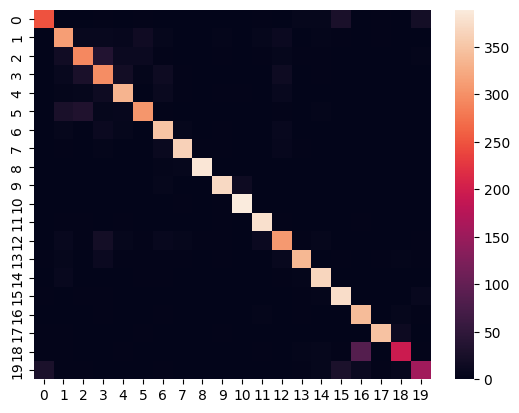

In [ ]:
seaborn.heatmap(confusion_matrix(newsgroups_test.target, predict_targets))

In [ ]:
newsgroups_test.target_names[18]

'talk.politics.misc'

In [ ]:
newsgroups_test.target_names[16]

'talk.politics.guns'

In [ ]:
ind = np.where(newsgroups_test.target != predict_targets)
ind = ind[0]
random_ind = np.random.randint(0,ind.shape[0],(2))
for i in random_ind:
    img=newsgroups_test.data[ind[i]]
    print ('Правильный класс: ',
           newsgroups_test.target_names[newsgroups_test.target[ind[i]]])
    print ('Предсказанный класс: ',
           newsgroups_test.target_names[predict_targets[ind[i]]])
    print(img)


Правильный класс:  comp.graphics
Предсказанный класс:  comp.windows.x
From: xyzzy@hal.gnu.ai.mit.edu (Daniel Drucker)
Subject: Re: Where did the hacker ethic go?
Organization: dis
Lines: 18
NNTP-Posting-Host: hal.ai.mit.edu

In article <gradyC6D7Ep.AwE@netcom.com> grady@netcom.com (1016/2EF221) writes:
>Where did the hacker ethic go?
>
>We hackers of the 70's and 80' are now comfortably employed
>and supporting families.  The next generation takes
>the radical lead now.  Don't look for radicalism among us
>old ones; we're gone...

And guess who's here in your place.

Please finger xyzzy@gnu.ai.mit.edu for information, or if you are
a mail/news only site, mail xyzzy@gnu.ai.mit.edu with the subject line
"SEND FINGER".


-- 
Daniel Drucker   N2SXX          | xyzzy@gnu.ai.mit.edu
Forever, forever, my Coda.      | und2dzd@vaxc.hofstra.edu

Правильный класс:  sci.electronics
Предсказанный класс:  comp.windows.x
From: pguello@uwsuper.edu (Paul Guello)
Subject: Re: solvent for duck tape adhesi

### 5. Выполните анализ текстового датасета с использованием выбранного классификатора. Датасет скачайте по ссылке https://www.kaggle.com/datasets/thorinhood/russian-twitter-sentiment/

1. Загрузка и подготовка данных

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd

dfN = pd.read_csv('negative.csv',  header=None, sep=';', quotechar='"')
dfP = pd.read_csv('positive.csv',  header=None, sep=';', quotechar='"')

Объедените данные в один датафрейм df с помощью concat

In [ ]:
df =
df = df.sample(frac=1).reset_index(drop=True) #перемешали данные


Посмотрите на получившиеся данные

Добавьте имена (id","date","name","message","sentiment", оставшиеся "undefined") колонкам с помощь df.columns

Посмотрите на получившиеся данные

Выполните предварительную обработку текстов: удалите стоп-слова и выполните стемминг

Разделите данные на обучающую и тестовую выборки (70% на обучение, 30% на тестирование) для трёх вариантов: исходные тексты, предварительно обработанные тексты и тексты после стемминга. С помощью функции prepare_data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def prepare_data(df, text_column, target_column, test_size=0.3, random_state=42):
  vectorizer = CountVectorizer()
  X = vectorizer.fit_transform(df[text_column])
  y = df[target_column]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test =
X_train_preprocess, X_test_preprocess, y_train_preprocess, y_test_preprocess =
X_train_stemming, X_test_stemming, y_train_stemming, y_test_stemming =

Обучите модели классификации (RandomForestClassifier и GradientBoostingClassifier) для каждого из трёх вариантов данных


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

Повторите обучение с использованием TfidfVectorizer для каждого варианта данных

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def prepare_data_TF(df, text_column, target_column, test_size=0.3, random_state=42):
  vectorizer = TfidfVectorizer()
  X = vectorizer.fit_transform(df[text_column])
  y = df[target_column]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test =
X_train_preprocess, X_test_preprocess, y_train_preprocess, y_test_preprocess =
X_train_stemming, X_test_stemming, y_train_stemming, y_test_stemming =